In [24]:
PROVIDE_OWN_INPUT = False

In [25]:
from google.colab import files
files.upload()

Saving dataset4.csv to dataset4 (1).csv


{'dataset4.csv': b'Company Name,Net Sales,Cons PAT,Cons OCF,OCF/PAT,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,1311.36,-504.97,49.48,-0.1,11.81,-36.9,-61.72,-4.81,0.34,2.6,0,40.37,19.55,0.27\r\n3M India Ltd.,1574.13,52.27,63.78,1.22,7.37,3.16,8.29,11.31,1.68,0.26,0,12.59,37.04,2.98\r\nAavas Financiers Ltd.,17.39,1.89,-172.5,-91.5,57.3,10.84,6.69,9.57,0.16,5.17,0,0,0,0\r\nABB India Ltd.,7610.48,140.94,-44.2,-0.31,4.76,1.85,5.49,9.82,1.19,0.13,45.1,13.15,39.42,2.05\r\nAbbott India Ltd.,1652.69,144.7,101.35,0.7,13.38,8.64,24.3,36.11,1.74,0,24.96,20.12,13.82,2.03\r\nAccelya Solutions India Ltd.,303.84,84.38,114.18,1.35,44.48,27.77,70.46,102.99,1.4,0,123.83,20.48,3.75,1.47\r\nAegis Logistics Ltd.,3981.64,33.6,1774.26,52.81,3.31,0.88,11.69,7.42,2.01,1.07,39.76,24.26,4.98,0.1\r\nAGC Networks Ltd.,1050.1,-21.9,-60.8,2.78,4.04,-2.08,-6.97,4.89,1,1.04,0,20.66,4.12,0.43\r\nAgro Tech Food

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
data = pd.read_csv('dataset4.csv')

In [28]:
data.head(20)

,Company Name,Net Sales,Cons PAT,Cons OCF,OCF/PAT,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,FR_Dividend Pay Out Ratio(%),Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,1311.36,-504.97,49.48,-0.10,11.81,-36.90,-61.72,-4.81,0.34,2.60,40.37,0.00,19.55,0.27
1,3M India Ltd.,1574.13,52.27,63.78,1.22,7.37,3.16,8.29,11.31,1.68,0.26,12.59,0.00,37.04,2.98
2,Aavas Financiers Ltd.,17.39,1.89,-172.50,-91.50,57.30,10.84,6.69,9.57,0.16,5.17,0.00,0.00,0.00,0.00
3,ABB India Ltd.,7610.48,140.94,-44.20,-0.31,4.76,1.85,5.49,9.82,1.19,0.13,13.15,45.10,39.42,2.05
4,Abbott India Ltd.,1652.69,144.70,101.35,0.70,13.38,8.64,24.30,36.11,1.74,0.00,20.12,24.96,13.82,2.03
5,Accelya Solutions India Ltd.,303.84,84.38,114.18,1.35,44.48,27.77,70.46,102.99,1.40,0.00,20.48,123.83,3.75,1.47
6,Aegis Logistics Ltd.,3981.64,33.60,1774.26,52.81,3.31,0.88,11.69,7.42,2.01,1.07,24.26,39.76,4.98,0.10
7,AGC Networks Ltd.,1050.10,-21.90,-60.80,2.78,4.04,-2.08,-6.97,4.89,1.00,1.04,20.66,0.00,4.12,0.43
8,Agro Tech Foods Ltd.,788.92,41.90,17.83,0.43,8.57,5.30,18.45,26.86,2.63,0.00,24.26,11.63,19.23,1.60
9,Akzo Nobel India Ltd.,2232.00,218.80,208.00,0.95,13.21,8.85,17.28,22.65,1.10,0.00,10.65,170.75,20.53,4.66


In [29]:
test = data.iloc[:,:]

In [30]:
data = data.replace( ' -   ', np.nan)

In [31]:
data.dtypes

Company Name                     object
Net Sales                       float64
Cons PAT                        float64
Cons OCF                        float64
OCF/PAT                         float64
PBIDTM (%)                      float64
PATM (%)                        float64
ROE (%)                         float64
ROCE (%)                        float64
Asset Turnover(x)               float64
Total Debt/Equity(x)            float64
Free Float                      float64
FR_Dividend Pay Out Ratio(%)    float64
Ev/EBITDA                       float64
M/Sales                         float64
dtype: object

In [32]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [33]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [34]:
data.fillna(data.mean(), inplace=True)

In [35]:
len(data.columns)

15

# **Ev/EBITDA Prediction**

In [36]:
data1 = data.iloc[:,:-1 ]

In [37]:
data1.tail()


,Company Name,Net Sales,Cons PAT,Cons OCF,OCF/PAT,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,FR_Dividend Pay Out Ratio(%),Ev/EBITDA
156,Whirlpool Of India Ltd.,2772.73,127.75,143.97,1.13,7.07,3.72,23.65,33.72,2.67,0.00,18.61,0.0,11.51
157,Wintac Ltd.,20.88,-17.20,-3.01,0.17,-11.89,-75.82,-55.50,-33.55,0.42,0.09,17.86,0.0,0.00
158,Wyeth Ltd.- (Amalgamated),678.34,130.06,92.32,0.71,28.08,18.54,24.80,36.88,0.99,0.00,28.03,29.7,8.03
159,Xchanging Solutions Ltd.,208.83,12.25,14.25,1.16,15.05,5.87,5.03,8.56,0.62,0.01,6.71,0.0,4.46
160,Zim Laboratories Ltd.,185.00,9.52,15.49,1.63,14.51,5.03,12.26,17.47,1.01,0.56,55.91,8.4,0.00


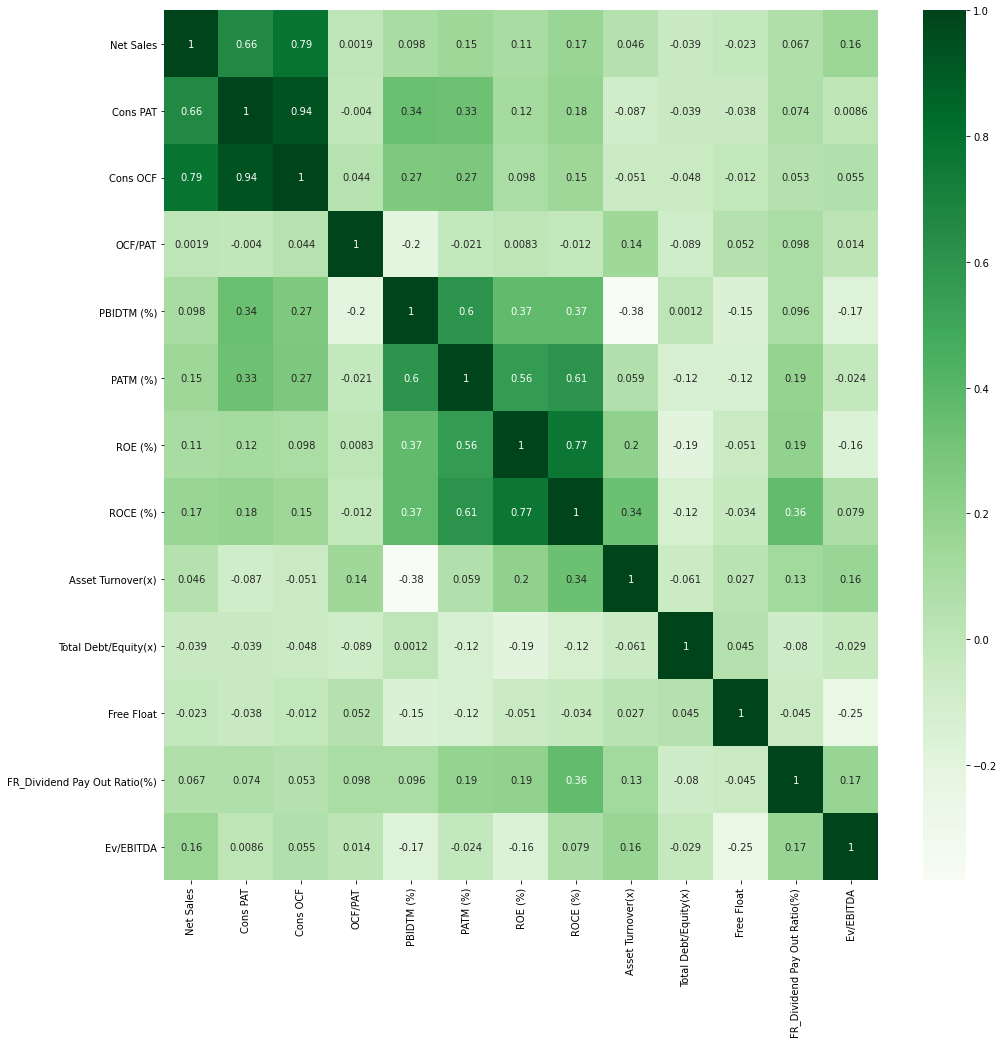

In [38]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

## Selecting most important features:

In [41]:
cor_target = abs(cor["Ev/EBITDA"])
relevant_features = cor_target[cor_target>0.15]
relevant_features.index

Index(['Net Sales', 'PBIDTM (%)', 'ROE (%)', 'Asset Turnover(x)', 'Free Float',
       'FR_Dividend Pay Out Ratio(%)', 'Ev/EBITDA'],
      dtype='object')

In [42]:
X,y = data1[['Net Sales', 'PBIDTM (%)', 'ROE (%)', 'Asset Turnover(x)', 'Free Float',
       'FR_Dividend Pay Out Ratio(%)']], data1['Ev/EBITDA']

In [43]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [44]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [45]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

 0 LassoCV                 55.7717035578
 1 XGBRegressor            86.7092449883
 2 RidgeCV                 40.7696272487
 3 BayesianRidge           39.0607305046
 4 ARDRegression           43.1705325437
 5 ElasticNetCV            54.5307845649
 6 LassoLarsCV             55.7717035578
 7 SVR                     55.8664468033


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [46]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 -0.04979
 1 XGBRegressor            -0.63213
 2 RidgeCV                 0.23259
 3 BayesianRidge           0.26476
 4 ARDRegression           0.18740
 5 ElasticNetCV            -0.02644
 6 LassoLarsCV             -0.04979
 7 SVR                     -0.05158


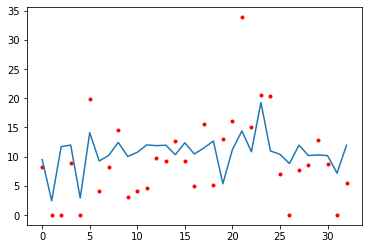

In [50]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[3])

# **M/Sales Prediction**

In [51]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [52]:
data2.head()

,Company Name,Net Sales,Cons PAT,Cons OCF,OCF/PAT,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,FR_Dividend Pay Out Ratio(%),M/Sales
0,3I Infotech Ltd.,1311.36,-504.97,49.48,-0.10,11.81,-36.90,-61.72,-4.81,0.34,2.60,40.37,0.00,0.27
1,3M India Ltd.,1574.13,52.27,63.78,1.22,7.37,3.16,8.29,11.31,1.68,0.26,12.59,0.00,2.98
2,Aavas Financiers Ltd.,17.39,1.89,-172.50,-91.50,57.30,10.84,6.69,9.57,0.16,5.17,0.00,0.00,0.00
3,ABB India Ltd.,7610.48,140.94,-44.20,-0.31,4.76,1.85,5.49,9.82,1.19,0.13,13.15,45.10,2.05
4,Abbott India Ltd.,1652.69,144.70,101.35,0.70,13.38,8.64,24.30,36.11,1.74,0.00,20.12,24.96,2.03


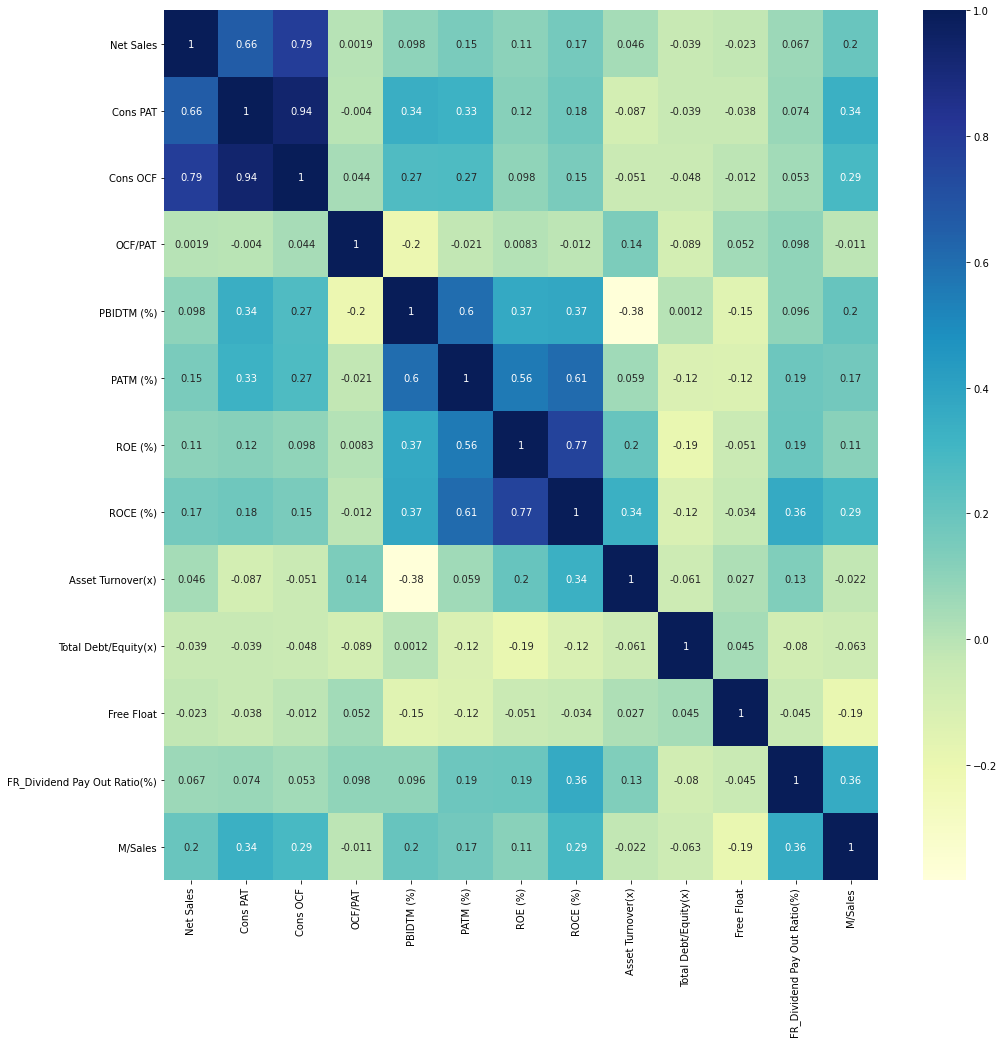

In [53]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [55]:
cor_target = abs(cor["M/Sales"])
relevant_features = cor_target[cor_target>=0.2]
relevant_features.index

Index(['Cons PAT', 'Cons OCF', 'PBIDTM (%)', 'ROCE (%)',
       'FR_Dividend Pay Out Ratio(%)', 'M/Sales'],
      dtype='object')

In [56]:
X,y = data2[['Cons PAT', 'Cons OCF', 'PBIDTM (%)', 'ROCE (%)',
       'FR_Dividend Pay Out Ratio(%)']], data2['M/Sales']

In [57]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [58]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [59]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 1.68439
 1 XGBRegressor            1.93293
 2 RidgeCV                 1.74922
 3 BayesianRidge           1.70968
 4 ARDRegression           1.75174
 5 ElasticNetCV            1.68418
 6 LassoLarsCV             1.73946
 7 SVR                     1.76843


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [ ]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 0.03001
 1 XGBRegressor            -0.41364
 2 RidgeCV                 0.00609
 3 BayesianRidge           0.06581
 4 ARDRegression           0.03058
 5 ElasticNetCV            0.03034
 6 LassoLarsCV             0.05452
 7 SVR                     -0.02523


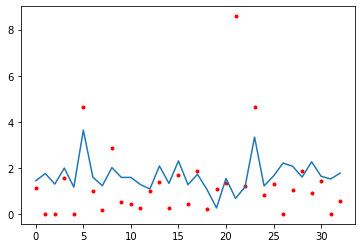

In [60]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[5])